# L05: Least squares and linear regression

**Sources and additional reading:**

- Lupton, chapters 10.3, 11
- Outlier plot: https://www.nature.com/articles/s41592-019-0369-z
- Ivezić, chapters 8.9, 8.11
- Andrew Ng and Tengyu Ma, [CS229 Lecture Notes](https://cs229.stanford.edu/main_notes.pdf)

## Example: Fitting straight line to data

Let us assume that we have a set of independent variables $(x_1, ..., x_n)$, as well as a corresponding set of observations $(y_1, ..., y_n)$. Each $y_i$ is drawn from a Gaussian distribution centered on $y_{t, i}$ with known standard deviation $\sigma_i$ (see figure below). In addition, we have a model that predicts $$y_{i, t} = f(x_i, \theta) = \theta_0+\theta_1x_i.$$ Our aim is to estimate the values of $\theta_0, \theta_1$.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

In [2]:
x = np.array([1, 2, 3, 4, 5])
y = np.array([0.47136149, 0.62539117, 0.45937599, 1.01167188, 1.03902946])
sigma = 0.2

Text(0, 0.5, '$y$')

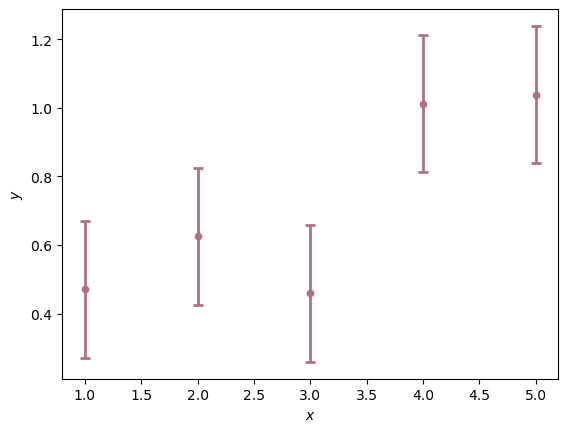

In [3]:
plt.errorbar(x, y, yerr=sigma*np.ones_like(x), marker='.', linewidth=2, markersize=9, \
                                elinewidth=2, capthick=2, capsize=3.5, linestyle='None', color='#AE7182')
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')

Given what we discussed last week, our method of choice is MLE, and we can write down the log-likelihood for this problem as $$\log P(y_1, ..., y_n|x_1, ..., x_n, \theta) = -\frac{n}{2}\log{2\pi}-\sum_i\log{\sigma_i}-\sum_i \frac{(y_i-f(x_i, \theta))^2}{2\sigma_i^2}.$$ As the variances are known, maximizing this likelihood is equivalent to minimizing the so-called $\chi^2$ quantity, defined as $$\chi^2 := -2\log P(y_1, ..., y_n|x_1, ..., x_n, \theta) = \sum_i \frac{(y_i-f(x_i, \theta))^2}{\sigma_i^2},$$ where we have ignored constants that do not depend on the parameters $\theta$. 

If the errors in all observations $y_i$ are equal (homescedastic), i.e. $\sigma_i=\sigma$ for all $i$, this simplifies to minimizing $$\chi^2 = \sum_i (y_i-f(x_i, \theta))^2.$$ This is nothing else than the sum of the squared deviations between the data and the model. Starting with MLE, we have rediscovered the method of *least squares* to estimate model parameters from data. For Gaussian data, the least squares (LS) estimator (with or without errors) is equivalent to the MLE, while for non-Gaussian data these two will generally differ, but the LS estimator can still be used. 

Just a note on terminology: Different application of the method of least squares have different names in the literature. Here, we will follow the convention that the method is called *ordinary least squares* if the model $f$ is linear in the parameters $\theta$ and the data are homoscedatic. If we drop the assumption of homoscedacity, we call the method *weighted least squares* for arbitrary models and *generalized least squares* for linear models. But beware that not all sources use the same conventions, the important thing to keep in mind is the general idea behind the method.

Let us now return to our initial problem of fitting a straight line to data as described above: This is the simplest case, as the model is linear in the parameters, and we assume that the data are homoscedatic, i.e. all errors are equal, $\sigma_i=\sigma$ for all $i$. From above, we can thus write the $\chi^2$ quantity to be minimized as $$\chi^2 = \sum_i (y_i- \theta_0-x_i\theta_1)^2.$$ With this, we can estimate $\hat{\theta}_0$ and $\hat{\theta}_1$ through $$\frac{\partial \chi^2}{\partial \hat{\theta}_0} \overset{!}{=} 0,$$ $$\frac{\partial \chi^2}{\partial \hat{\theta}_1} \overset{!}{=} 0.$$ Inserting and expanding out then gives $$\hat{\theta}_1=\frac{\sum_i(x_i-\bar{x})(y_i-\bar{y})}{\sum_i(x_i-\bar{x})^2},$$ $$\hat{\theta}_0=\bar{y}-\hat{\theta}_1\bar{x},$$ where $\bar{x}=\frac{1}{n}\sum_i x_i$ and $\bar{y}=\frac{1}{n}\sum_i y_i$.

Let's use these results to derive the best-fit straight line for the data points above:

In [4]:
xmean = np.mean(x)
ymean = np.mean(y)

theta1 = np.sum((x-xmean)*(y-ymean))/np.sum((x-xmean)**2)
theta0 = ymean-theta1*xmean

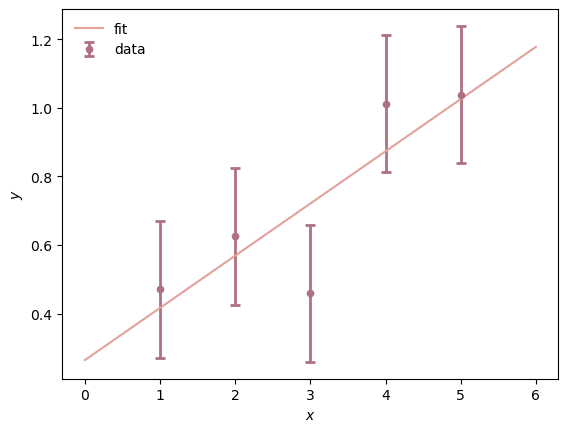

In [5]:
xs = np.arange(0, 7)

plt.errorbar(x, y, yerr=sigma*np.ones_like(x), marker='.', linewidth=2, markersize=9, \
                                elinewidth=2, capthick=2, capsize=3.5, linestyle='None', \
                                color='#AE7182', label='data')
plt.plot(xs, theta0+xs*theta1, color='#e3a19c', label='fit')
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.legend(frameon=False)

## Generalized least squares (aka linear least squares with arbitrary covariance)

While least squares methods can be used for arbitrary models and distributions of the data, today, we will focus on  the particular case of a model linear in the parameters and Gaussian data, i.e. linear least squares (LLS). As we will show below, in this case the LS estimator has an analytic solution and a number of useful properties.

Compared to above we now generalize our discussion in several ways: First, we will drop the assumption of homoscedasticity. Secondly so far we have assumed univariate $x$, but we can equally apply the methodology introduced above to multivariate variables. 

Let us assume that $\boldsymbol{x}$ is a multivariate vector of length $k$, and $y$ is the corresponding measurement. Our model predicts that the scalar $y_i$ depend on $\boldsymbol{x}$ through $$y_{i} = y_{t, i}+\epsilon_i=\theta_0 + \theta_1 x_{i1} + \cdots \theta_k x_{ik} +\epsilon_i,$$ where $\epsilon_i$ denotes the random error with $\langle\epsilon_i\rangle=0$ for all $i$. 

Let us further assume that we would like to fit $n$ pairs $(y_i, x_{i1}, \cdots,x_{ik})_{i=1}^{n}$ using this model. We denote $\boldsymbol{y}$ as the $n\times 1$ vector of observations and assume that $\boldsymbol{y}$ is Gaussian-distributed around $\boldsymbol{y_t}$ with covariance matrix $C$. Then we can reexpress the above equation as $$\boldsymbol{y}=M\boldsymbol{\theta}+\boldsymbol{\epsilon}.$$ Here, $\boldsymbol{\theta}$ is an $(k+1) \times 1$ parameter vector and $\boldsymbol{\epsilon}$ is an $n \times 1$ vector drawn from a Gaussian distribution with mean $0$ and covariance matrix $C$ (here we will always assume a Gaussian distribution to maintain the link to MLE, but we will show which properties of LLS estimators also hold for non-Gaussian data). The matrix $M$ has dimensions $n\times (k+1)$.

As an example, in our previous case we would have $$\boldsymbol{y}=\begin{bmatrix} y_1 \\ \vdots \\ y_n \end{bmatrix},$$ $$\boldsymbol{\theta}=\begin{bmatrix} \theta_0 \\ \theta_1 \end{bmatrix},$$ and $$M=\begin{bmatrix} 1 & x_1 \\ \vdots \\ 1 & x_n \end{bmatrix}.$$

In the case of Gaussian data, maximizing the likelihood then reduces to minimizing the $\chi^2$-variable $$\chi^2=(\boldsymbol{y}-M\boldsymbol{\theta})^TC^{-1}(\boldsymbol{y}-M\boldsymbol{\theta})=\boldsymbol{y}^TC^{-1}\boldsymbol{y} - \boldsymbol{\theta}^TM^TC^{-1}\boldsymbol{y} -\boldsymbol{y}^TC^{-1}M\boldsymbol{\theta}+\boldsymbol{\theta}^TM^TC^{-1}M\boldsymbol{\theta}.$$ Since $\boldsymbol{\theta}^TM^TC^{-1}\boldsymbol{y}$ is a scalar we have $\boldsymbol{y}^TC^{-1}M\boldsymbol{\theta}=\boldsymbol{\theta}^TM^TC^{-1}\boldsymbol{y}$.

As in the MLE case, we can obtain the minimum of the $\chi^2$ by setting the first derivative with respect to $\boldsymbol{\theta}$ to zero, i.e. $$\frac{\partial \chi^2}{\partial \boldsymbol{\theta}}=- 2M^TC^{-1}\boldsymbol{y} +2M^TC^{-1}M\boldsymbol{\theta}\overset{!}{=} 0.$$ Thus we get $$\hat{\boldsymbol{\theta}}_{\mathrm{LLS}}=(M^TC^{-1}M)^{-1}M^TC^{-1}\boldsymbol{y}.$$

Let us look at the expectation value of the LLS estimator, i.e. $$\langle \hat{\boldsymbol{\theta}}\rangle=\langle(M^TC^{-1}M)^{-1}M^TC^{-1}(M\boldsymbol{\theta}+\boldsymbol{\epsilon})\rangle = \boldsymbol{\theta} + (M^TC^{-1}M)^{-1}M^TC^{-1}\langle \boldsymbol{\epsilon}\rangle = \boldsymbol{\theta}.$$ Thus we find that the LLS estimator is unbiased. 

In addition, inspecting the expression for the LLS estimator shows that $\hat{\boldsymbol{\theta}}$ is a linear combination of  $\boldsymbol{y}$. Thus if $\boldsymbol{y}$ is a Gaussian random variable (as we are assuming here), then $\hat{\boldsymbol{\theta}}$ is a Gaussian random variable itself. Therefore, we see that the linear least squares estimator is Gaussian-distributed for Gaussian initial data. We can compute its covariance matrix (which completely characterizes its distribution alongside the mean) analytically as $$C(\hat{\boldsymbol{\theta}})=\langle (\hat{\boldsymbol{\theta}}-\boldsymbol{\theta})(\hat{\boldsymbol{\theta}}-\boldsymbol{\theta})^T \rangle=\langle (M^TC^{-1}M)^{-1}M^TC^{-1}\boldsymbol{\epsilon}\boldsymbol{\epsilon}^TC^{-1}M(M^TC^{-1}M)^{-1}\rangle = (M^TC^{-1}M)^{-1}M^TC^{-1}\langle\boldsymbol{\epsilon}\boldsymbol{\epsilon}^T\rangle C^{-1}M(M^TC^{-1}M)^{-1} = (M^TC^{-1}M)^{-1}.$$ 

To summarize this means that 
- for general data, the LLS estimator is unbiased, has a covariance matrix given by $C(\hat{\boldsymbol{\theta}})$, and is the minimum-variance unbiased linear estimator.
- for Gaussian data, in addition to the above, the LLS estimator is equivalent to the MLE and is normally-distributed.

Note, as opposed to MLE, this is true irrespective of the sample size.

Thus this shows that are free to use LLS (and also LS in general) also for non-Gaussian data (this is equivalent to minimizing a cost function of choice). However in this case, the ML and the LLS estimators will not necessarily coincide and the LLS estimator will also not be Gaussian-distributed.

### Aside: Linearity of model

It is important to note that linear least squares regression assumes a model linear in the parameters, but does not assume it to be linear in the measurements $\boldsymbol{x}$. The following three examples illustrate types of models linear in the parameters but not in the dependent variables. All of these can be fit using LLS with the caveats mentioned above in case the data is not Gaussian: $$y_{i, t} = \theta_0 + \theta_1 x_i + \theta_2 x_i^2 +
\cdots + \theta_k x_i^k,$$ $$y_{i,t}=\theta_0e^{x_i},$$ $$y_{i,t}=\theta_0 + \theta_1 \sin{x_i}+\theta_2\cos{x_i}.$$

## The role of outliers

Linear least squares regression minimizes the square of the residuals between data and model. This means that outliers (i.e. data points that differ significantly from other data points) can have a large influence on the derived fit, see e.g. the RHS of the plot below

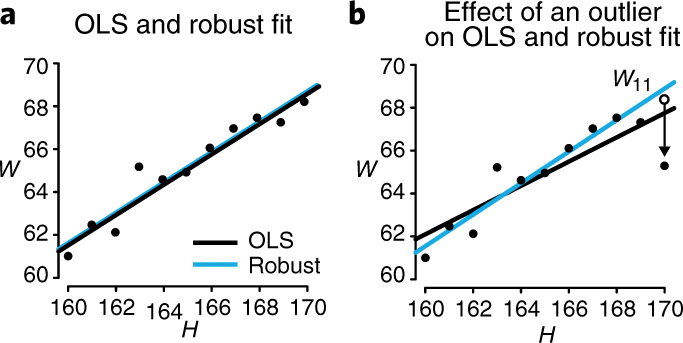

In LLS this can happen for non-Gaussian-distributed data when the likelihood for the points has heavy tails; it can also happen if something went wrong with measuring that particular data point etc. If we do not have a good reason to believe these outliers to be wrong, we should **never** discard them. The usual way to treat outliers in a LLS analysis is to use so-called robust regression methods. These essentially derive model parameters by minimizing functions alternative to $\chi^2$. These functions are chosen such as to minimize the effect of outliers. A popular method is *L1 regression*, where we minimize the L1-norm, i.e. $$\mathrm{L}_1 = \sum_i |y_i-f(x_i, \theta)|,$$ which is less affected by significant outliers.

Another related approach is *M-regression* which minimizes a generic function of the residuals chosen to be more robust to outliers.

## Which model best fits my data? - Cross-validation

A fundamental question we face in statistics (and in Machine Learning as we will see later in this course) is the following: Let us assume we have measured data $(x_i, y_i)$ and would like to fit this data with a model $f(x_i, \theta)$. Let us further assume that we have several different models $f$ with varying complexity. How do we find the model that best describes our data? 

Naively, what we could do is to minimize our loss function ($\chi^2$, L1-norm etc.) on the observed data set. This would essentially lead us to picking the most complex model as this would naturally minimze the loss on our observed data. But is this really what we want?

Since the data we have observed is just a finite sample what we really want is to find a model that will also perform well on another sample (which we have note seen yet). So in general we have that:

1. The higher the model complexity, the better the observed data will be fit.
2. The better we fit the observed data, the more we will be starting to also fit the noise (as opposed to only the signal) and will thus end up with a model that would perform very poorly on unseen data. You can imagine the extreme example of fitting $m$ data points with $m$ parameters. This is called *overfitting*.

### The idea of generalizability

The basic idea is that a model that overfits the data will perform well on the data it has been trained on but will generalize very poorly to unseen data. Therefore, one thing we can do to deal with this problem is to split the data we are trying to fit into three parts: *training*, *validation*, and *test* data. We then proceed as follows:

We fit our model using the *training* data by minimizing the loss. However minimizing this loss is not our ultimate goal as we are trying to find a predictive model. The most important evaluation metric for our model is how well it performs on the unseen *validation* and *test* data sets. A small *validation* and *test* error tells us that our model is able to generalize well and it is this error we are trying to minimize.

There are a number of different approaches to choose the optimal model for the data we have observed based on generalizbility (we will see this again when we talk about Machine Learning), but a very powerful method is so-called *cross-validation*, which we will now illustrate on an example.

### Example: $k$-fold Cross-validation 

Let us assume that we have measured the $n$ data points $y_i$ shown below as a function of $x_i$. Our model is that $$y_{i} = \theta_0 + \theta_1 x_i + \theta_2 x_i^2 +\cdots + \theta_d x_i^d + \epsilon_i,$$ where $\epsilon$ denotes the noise of our data. A priori, we do not know the degree $d$ of the polynomial in our model.

How do we choose the degree $d$ of the polynomial that optimally fits our data?

Let us first look at the data:

Text(0, 0.5, '$y$')

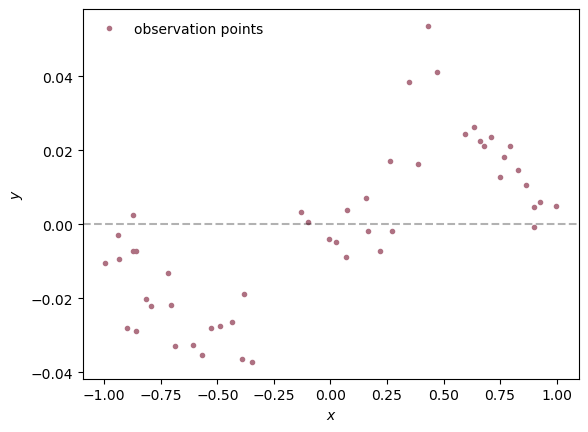

In [6]:
x, y = np.loadtxt('data/observations.txt').T

x = x[:50]
y = y[:50]

plt.plot(x,y,'.', c='#AE7182', label='observation points')
plt.axhline(0, c='k', linestyle='--', alpha=0.3)
plt.legend(framealpha=0.0,frameon=False)
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')

Now let us compute the best-fitting polynomial for a number of different degrees $d$. In our example we go up to a maximal degree of $d=13$:

In [7]:
def polynom_fit(xi, yi, deg):
    """
    Fits a linear polynomial to the data points xi, yi.
    Args:
    xi (:obj:`integer`, `float` or `array`): x coordinates of points to fit
    yi (:obj:`integer`, `float` or `array`): y coordinates of points to fit
    deg (:obj:`integer` or `float`): degree of polynomial
    
    Returns:
        res (:obj:`integer`, `float` or `array`): best fit coefficients
        X (:obj:`integer`, `float` or `array`): least squares coefficient matrix
    """

    X = np.zeros((xi.shape[0], deg+1))
    for i in range(deg+1):
        X[:, i] = xi**i
    res = np.linalg.lstsq(X, yi, rcond=None)
    
    return res[0], X

In [8]:
res = []
X = []
fit = []

for deg in range(1, 14):
    res_temp, X_temp = polynom_fit(x, y, deg)
    fit_temp = np.dot(X_temp, res_temp)
    res.append(res_temp)
    X.append(X_temp)
    fit.append(fit_temp)

Let's now look at our different fits:

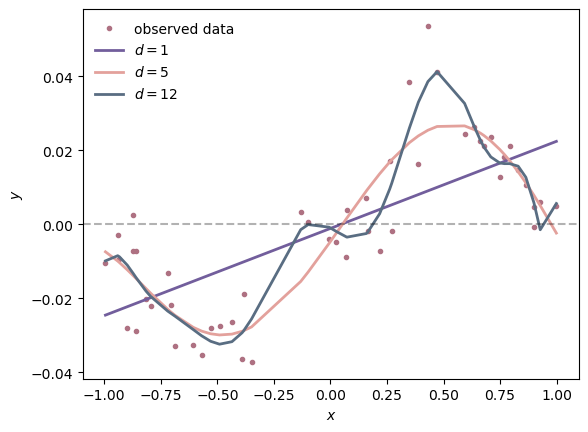

In [9]:
sorted_ind = np.argsort(x)

plt.plot(x, y, '.', c='#AE7182', label='observed data')
plt.plot(x[sorted_ind], fit[0][sorted_ind], color='#725e9c', label=r'$d={}$'.format(1), linewidth=2)
plt.plot(x[sorted_ind], fit[4][sorted_ind], color='#e3a19c', label=r'$d={}$'.format(5), linewidth=2)
plt.plot(x[sorted_ind], fit[11][sorted_ind], color='#596d82', label=r'$d={}$'.format(12), linewidth=2)
plt.axhline(0, c='k', linestyle='--', alpha=0.3)
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.legend(frameon=False, loc='upper left')

As we can see, the higher the degree of the polynomial the "better" our data will be fit, i.e. the smaller our loss. However, we can already see that a higher degree starts to fit increasingly complex features in the data which is a sign that we are actually starting to fit the noise instead of only the signal.

So what do we do?

A popular algorithm for model selection is $k$-fold cross-validation. Let us assume our data consists of $n$ pairs $(x_i, y_i)_{i=1}^n$. We then subdivide our data into $k$ subsamples of length $n_k$, and compute the best-fitting model parameters for the data leaving out each of these subsets at a time. We can then evaluate the performance of the model both on the data we have used to fit, and the data that we did not use. 

The general algorithm is as follows: For each $i\leq k$:

1. Determine the best-fit model parameters from the data leaving out the $i$-th subsample.

2. Compute the so-called cross-validation error on the held-out sample.

Finally compute the averaged cross-validation error as $$\mathrm{MSE}_{\mathrm{CV}}=\frac{1}{k}\sum_{i=1}^k\frac{1}{n_k}\sum_{j=1}^{n_k}(\hat{y}_{j, -i}-y_j)^2,$$ where $\hat{y}_{j, -i}$ denotes the model prediction for data point $j$ when the $i$-th sample has been left out of the fitting. In analogy, we can compute the averaged training set error through $$\mathrm{MSE}_{\mathrm{tr}}=\frac{1}{k}\sum_{i=1}^k\frac{1}{n_t}\sum_{j=1}^{n_t}(\hat{y}_{j}-y_j)^2.$$

Below you can see an illustration of $k$-fold cross-validation:

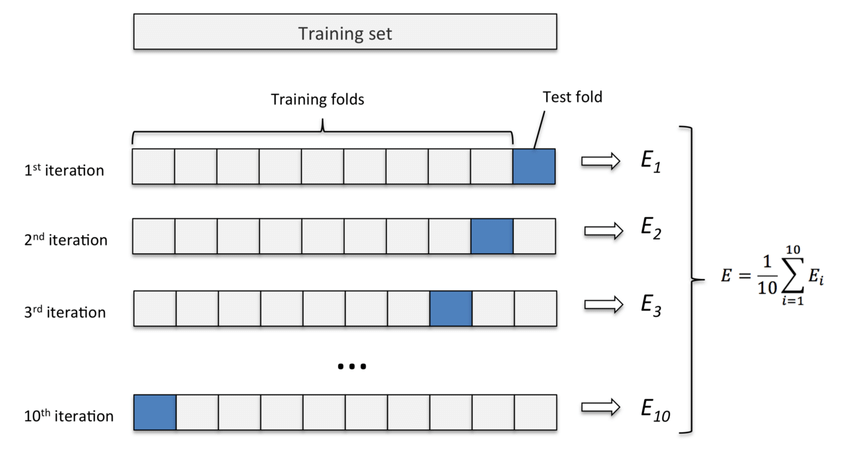

Before looking at our example we can already anticipate what will happen: While a more complex model will perform well on the training set, i.e. lead to a small $\mathrm{MSE}_{\mathrm{tr}}$, we expect it to perform increasingly poorly on the cross-validation set, i.e. lead to a large $\mathrm{MSE}_{\mathrm{CV}}$. We can then pick the optimal model from a tradeoff between minimizing the prediction errors for the training set and maximizing generalizability. 

Let us look at this in practice by going back to our example:

In [10]:
def polynom_expansion(xi, coeffs, deg):
    """
    Determines the polynomial fit to xi.
    Args:
    xi (:obj:`integer`, `float` or `array`): x coordinates of points to fit
    coeffs (:obj:`integer`, `float` or `array`): polynomial coefficients
    deg (:obj:`integer` or `float`): degree of polynomial
    
    Returns:
        exp (:obj:`integer`, `float` or `array`): value of polynomial at xi
    """
    
    exp = 0.
    for i in range(deg+1):
        exp += coeffs[i]*xi**i
    
    return exp

In [11]:
nfolds = 10
lenfolds = x.shape[0]//nfolds
maxdeg = 10

err_training = np.zeros(maxdeg+1)
err_cv = np.zeros(maxdeg+1)
for deg in range(maxdeg+1):
    err_cv_i = np.zeros(nfolds)
    err_tr_i = np.zeros(nfolds)
    for i in range(nfolds):
        mask = np.ones_like(x, dtype=bool)
        mask[lenfolds*i:lenfolds*(i+1)] = 0
        xsample = x[mask]
        ysample = y[mask]
        res, X = polynom_fit(xsample, ysample, deg)
        fit_cv = polynom_expansion(x[~mask], res, deg)
        err_cv_i[i] = np.sum((fit_cv-y[~mask])**2)/fit_cv.shape[0]
        fit_tr = polynom_expansion(x[mask], res, deg)
        err_tr_i[i] = np.sum((fit_tr-y[mask])**2)/fit_tr.shape[0]
    err_training[deg] = np.mean(err_tr_i)
    err_cv[deg] = np.mean(err_cv_i)

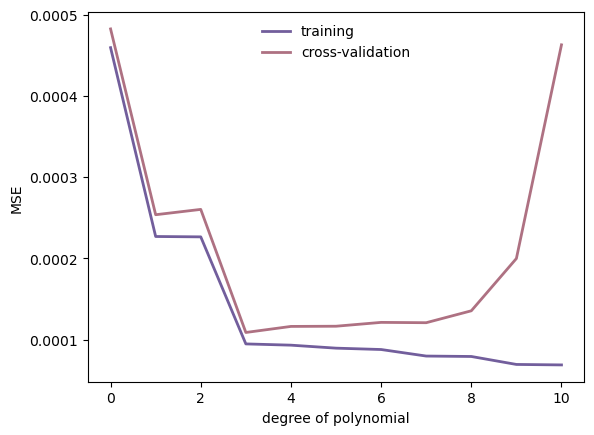

In [12]:
plt.plot(np.arange(maxdeg+1), err_training, color='#725e9c', linewidth=2, label='training')
plt.plot(np.arange(maxdeg+1), err_cv, color='#AE7182', linewidth=2, label='cross-validation')
plt.xlabel('degree of polynomial')
plt.ylabel('MSE')
plt.legend(frameon=False)

We see that while the training error decreases steadily as we increase model complexity, the validation error first decreases but then starts to increase again. This is a manifestation of the so-called *bias-variance tradeoff*. 

In order to understand this, let us assume our data are drawn from the following model $$y_i=f_{\star}(x_i, \theta)+\epsilon_i,$$ where $\epsilon_i$ denotes the random error. Let us now pick a *training* set $T$ and use it to obtain the optimal model $f_{T}$. Let $x, y$ be our *validation*/*test* set; we can then rewrite its expected mean-squared error as: $$\mathrm{MSE}(x)=\langle (y-f_{T}(x, \theta))^2\rangle,$$ where the expectation value is taken over all training sets $T$ and noise realizations. We can decompose this as follows $$\mathrm{MSE}(x)=\langle (y-f_{T}(x, \theta))^2\rangle=\langle (f_{\star}(x, \theta)+\epsilon-f_{T}(x, \theta))^2\rangle=\langle \epsilon^2\rangle + \langle(f_{\star}(x, \theta)-f_{T}(x, \theta))^2\rangle.$$ 

We can denote $\langle f_{T}(x, \theta) \rangle$ as the (hypothetical) model obtained by drawing an infinite number of training data sets, training on them and averaging their predictions for $x$ (note that this is often equivalent to the model obtained when training on a single, infinite training set). With this, we thus obtain $$\mathrm{MSE}(x)=\langle \epsilon^2\rangle + (f_{\star}(x, \theta)-\langle f_{T}(x, \theta) \rangle)^2 + \langle (\langle f_{T}(x, \theta) \rangle-f_{T}(x, \theta))^2\rangle.$$ We have decomposed the MSE into an irreducible error due to the noise of our data, a bias term and a variance term (cf. lecture 3). The bias quantifies the error we make because our model is not able to approximate $f_{\star}(x, \theta)$ (has nothing to do with the size of our sample), while the variance term measures the sensitivity of the model to the specific sample chosen.

Increasing the complexity of a model will clearly decrease the bias but it will also increase the variance and thus the MSE curve for the *validation*/*test* set will exhibit the U-shape that we have seen before. This is the *bias-variance tradeoff*, illustrated below:

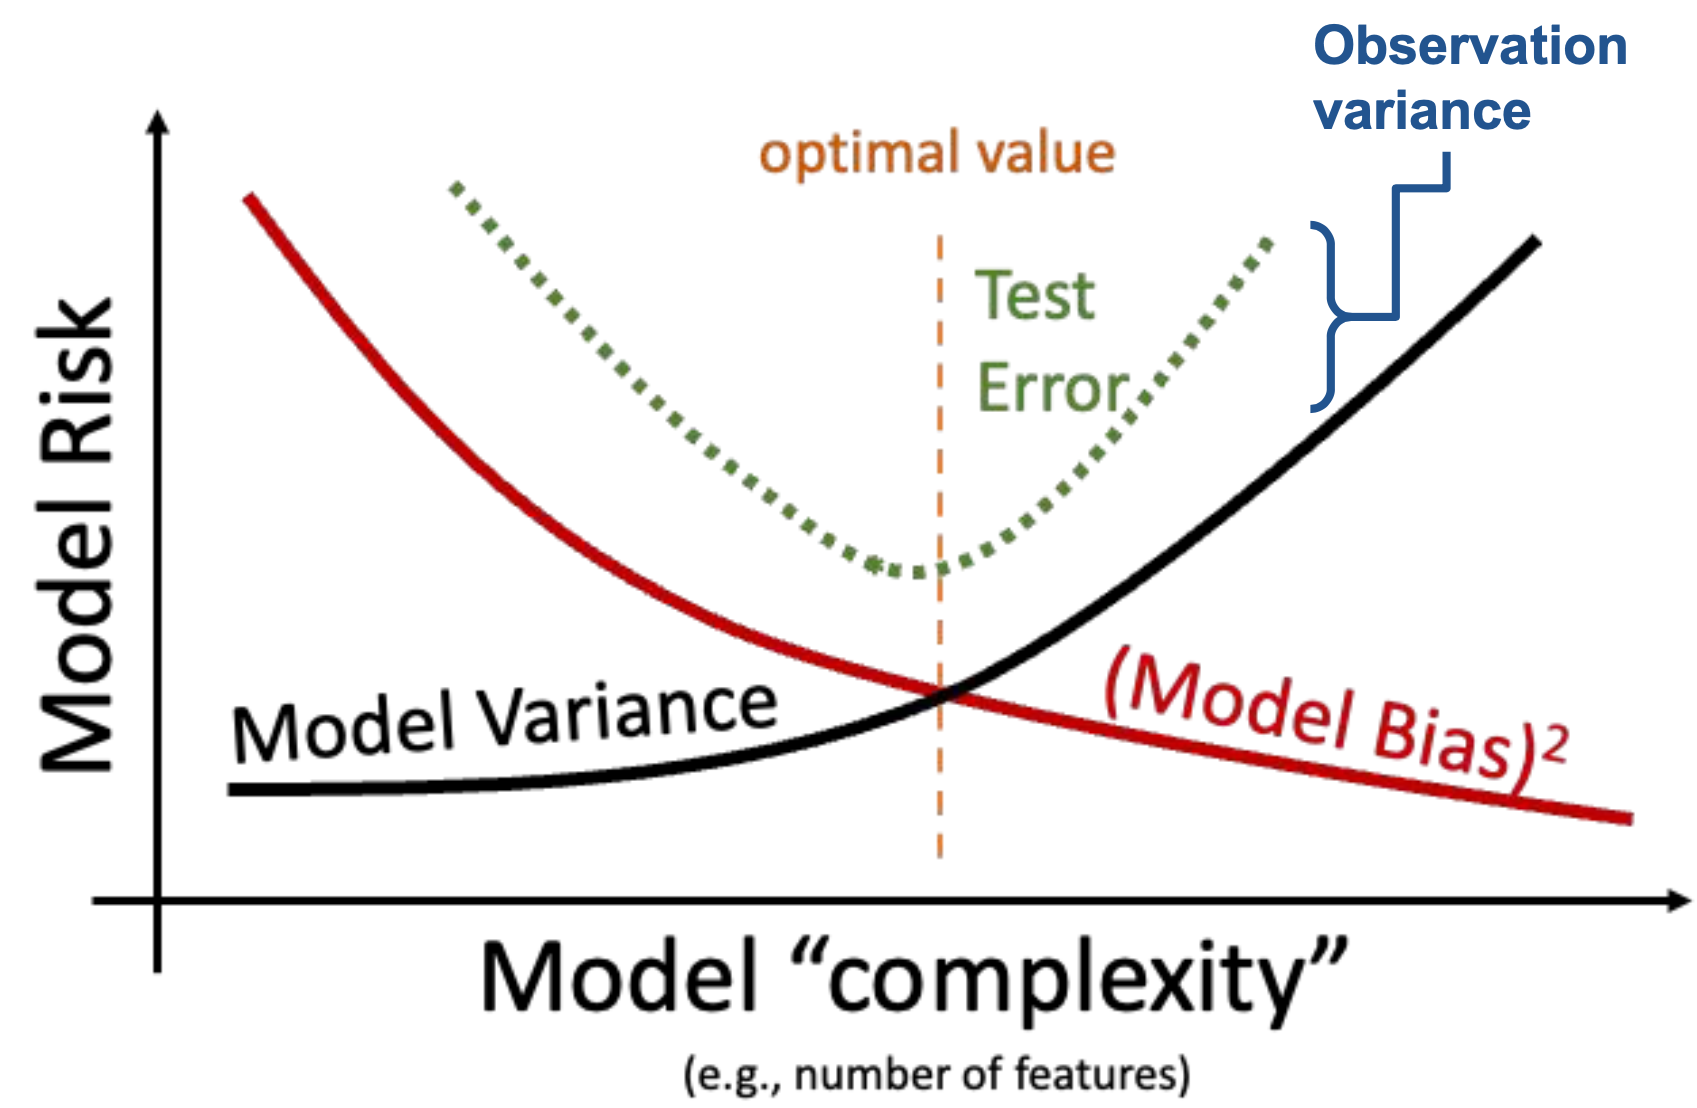

Coming back to our example we see that around polynomial degree of $d\simeq 8$, $\mathrm{MSE}_{\mathrm{CV}}$ starts to increase while $\mathrm{MSE}_{\mathrm{tr}}$ continues to decrease as we increase model complexity. This shows that for higher than approximately 8th degree polynomials, the decrease in bias is dwarfed by the increase in variance, which is a sign that we start fitting the noise features in the particular data set thus causing the fit to perform increasingly poorly on unseen data. From this we can thus conclude that an optimal choice for a fitting polynomial is around $d=6$.  

**Note:** Here we did not differentiate between *validation* and *test* data for simplicity. However, as we will see when we talk about ML, it is essential to have separate *validation* and *test* data sets. The *validation* set is used to pick the optimal complexity of our model, while the *test* data allow us to obtain an unbiased estimate of the model performance.